> ## **Scatter Matrix**

### Allowed functions : ```import pandas as pd, import sqlite3, from pandas.plotting import scatter_matrix```

In [2]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [8]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
select *
from sqlite_master
where type like 'table'
'''

pd.read_sql(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,pageviews,pageviews,2,"CREATE TABLE ""pageviews"" (\n""index"" INTEGER,\n..."
1,table,checker,checker,19,"CREATE TABLE ""checker"" (\n""index"" INTEGER,\n ..."
2,table,deadlines,deadlines,83,"CREATE TABLE ""deadlines"" (\n""index"" INTEGER,\n..."


In [18]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
PRAGMA table_info(pageviews);
'''

pd.read_sql(query,conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


In [ ]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
PRAGMA table_info(checker);
'''

pd.read_sql(query,conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [20]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
PRAGMA table_info(deadlines);
'''

pd.read_sql(query,conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,labs,TEXT,0,None,0
2,2,deadlines,INTEGER,0,None,0


In [16]:
query = """
        select uid, count(*) as pageviews 
        from pageviews
        where uid not like 'admin%'
        group by uid
        """

views = pd.read_sql(query, conn)
views

,uid,pageviews
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


In [17]:
query = """
        select uid, count(*) as num_commits 
        from checker
        where uid not like 'admin%' and labname != 'project1'
        group by uid
        """

commits = pd.read_sql(query, conn)
commits

,uid,num_commits
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


In [36]:
query = """
SELECT checker.uid, checker.labname, MIN(checker.timestamp) AS first_commit
    FROM checker
    JOIN (
        SELECT uid, MIN(datetime) AS first_view
        FROM pageviews
        WHERE uid LIKE 'user_%'
        GROUP BY uid
    ) AS pv ON checker.uid = pv.uid
    WHERE checker.uid not LIKE 'admin%'
      AND checker.labname != 'project1'
      AND checker.status = 'ready'
    GROUP BY checker.uid, checker.labname
        """

pd.read_sql(query, conn)

,uid,labname,first_commit
0,user_1,code_rvw,2020-04-26 19:06:58.949373
1,user_1,lab05s,2020-05-03 20:27:06.316718
2,user_1,laba04,2020-04-26 17:06:18.462708
3,user_1,laba04s,2020-04-26 17:12:11.843671
4,user_1,laba05,2020-05-02 19:15:18.540185
...,...,...,...
60,user_30,lab05s,2020-05-03 12:27:10.100749
61,user_30,laba04,2020-04-18 13:36:53.971502
62,user_30,laba04s,2020-04-18 14:51:37.498399
63,user_30,laba05,2020-05-01 19:31:18.375833


In [37]:
query = """
SELECT
    c.uid,
    c.labname,
    c.first_commit,
    d.deadlines,
    JULIANDAY(c.first_commit) - JULIANDAY(DATETIME(d.deadlines, 'unixepoch')) AS diff
FROM (
    SELECT checker.uid, checker.labname, MIN(checker.timestamp) AS first_commit
    FROM checker
    JOIN (
        SELECT uid, MIN(datetime) AS first_view
        FROM pageviews
        WHERE uid LIKE 'user_%'
        GROUP BY uid
    ) AS pv ON checker.uid = pv.uid
    WHERE checker.uid not LIKE 'admin%'
      AND checker.labname != 'project1'
      AND checker.status = 'ready'
    GROUP BY checker.uid, checker.labname
) AS c
JOIN deadlines AS d ON c.labname = d.labs
        """
diff=pd.read_sql(query, conn)
diff

,uid,labname,first_commit,deadlines,diff
0,user_1,laba04,2020-04-26 17:06:18.462708,1587945599,-0.287275
1,user_10,laba04,2020-04-25 08:24:52.696624,1587945599,-1.649379
2,user_14,laba04,2020-04-18 15:14:00.312338,1587945599,-8.365263
3,user_17,laba04,2020-04-23 14:24:29.947554,1587945599,-3.399642
4,user_18,laba04,2020-04-26 19:48:11.822365,1587945599,-0.174852
5,user_19,laba04,2020-04-20 19:05:01.297780,1587945599,-6.204835
6,user_21,laba04,2020-04-21 17:48:00.487806,1587945599,-5.258316
7,user_25,laba04,2020-04-20 19:16:50.673054,1587945599,-6.196624
8,user_28,laba04,2020-04-22 21:47:19.707242,1587945599,-4.092121
9,user_3,laba04,2020-04-23 20:29:14.054364,1587945599,-3.146354


In [49]:
avg_diff=diff.groupby('uid').mean('diff')['diff']*24
avg_diff

uid
user_1     -65.119644
user_10    -75.242310
user_14   -159.568696
user_17    -62.207513
user_18     -6.367907
user_19    -99.440298
user_21    -96.111041
user_25    -93.474751
user_28    -86.793652
user_3    -105.738041
user_30   -145.528546
Name: diff, dtype: float64

In [53]:
avg_diff.rename('avg_diff', inplace=True)

uid
user_1     -65.119644
user_10    -75.242310
user_14   -159.568696
user_17    -62.207513
user_18     -6.367907
user_19    -99.440298
user_21    -96.111041
user_25    -93.474751
user_28    -86.793652
user_3    -105.738041
user_30   -145.528546
Name: avg_diff, dtype: float64

In [ ]:
avg_diff=avg_diff.to_frame()
avg_diff

,avg_diff
uid,
user_1,-65.119644
user_10,-75.242310
user_14,-159.568696
user_17,-62.207513
user_18,-6.367907
user_19,-99.440298
user_21,-96.111041
user_25,-93.474751
user_28,-86.793652


In [59]:
pivot = pd.merge(commits, views, on='uid', how='inner')
pivot = pd.merge(pivot, avg_diff, on='uid', how='inner')
pivot

,uid,num_commits,pageviews,avg_diff
0,user_1,62,28,-65.119644
1,user_10,20,89,-75.242310
2,user_14,61,143,-159.568696
3,user_17,51,47,-62.207513
4,user_18,5,3,-6.367907
5,user_19,118,16,-99.440298
6,user_21,65,10,-96.111041
7,user_25,79,179,-93.474751
8,user_28,60,149,-86.793652
9,user_3,18,317,-105.738041


array([[<AxesSubplot: xlabel='avg_diff', ylabel='avg_diff'>,
        <AxesSubplot: xlabel='pageviews', ylabel='avg_diff'>,
        <AxesSubplot: xlabel='num_commits', ylabel='avg_diff'>],
       [<AxesSubplot: xlabel='avg_diff', ylabel='pageviews'>,
        <AxesSubplot: xlabel='pageviews', ylabel='pageviews'>,
        <AxesSubplot: xlabel='num_commits', ylabel='pageviews'>],
       [<AxesSubplot: xlabel='avg_diff', ylabel='num_commits'>,
        <AxesSubplot: xlabel='pageviews', ylabel='num_commits'>,
        <AxesSubplot: xlabel='num_commits', ylabel='num_commits'>]],
      dtype=object)

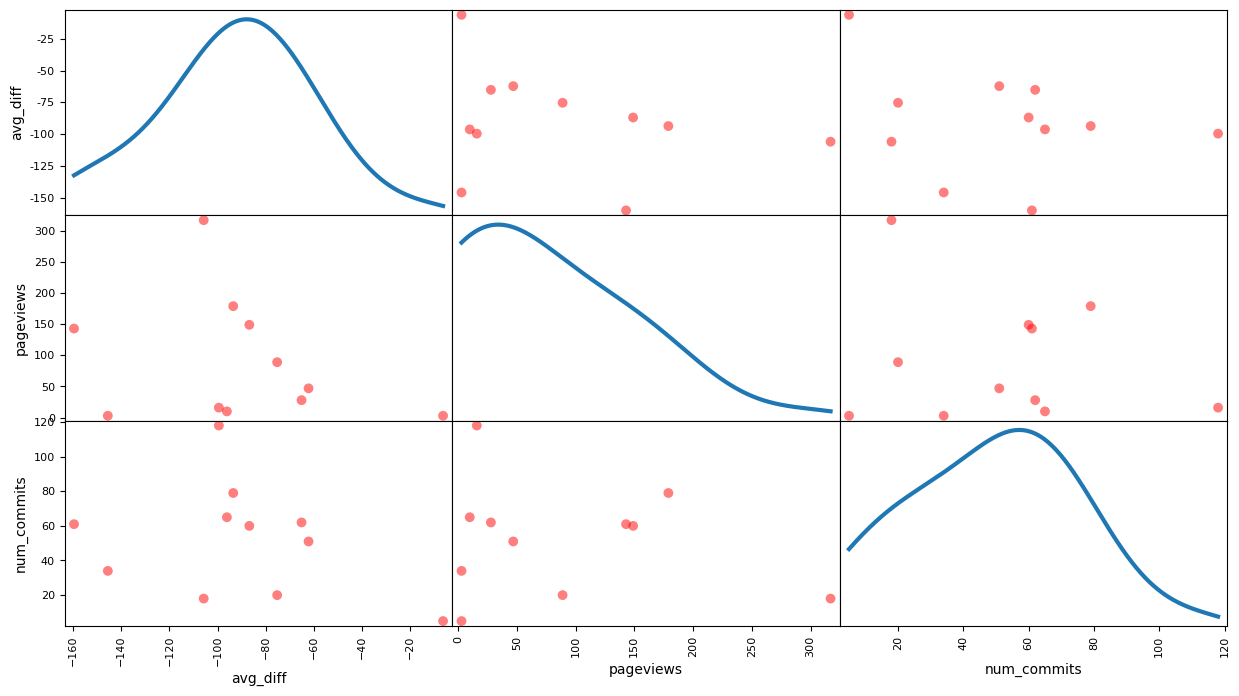

In [60]:
data = pivot[['avg_diff', 'pageviews', 'num_commits']]
scatter_matrix(data, figsize=(15, 8), diagonal='kde', s=200, color='r', density_kwds=dict(linewidth=3))

## Можно ли сказать, что если у пользователя мало просмотров, то у него, скорее всего, мало коммитов?

> НЕТ

## Можно ли сказать, что если у пользователя мало просмотров, то, скорее всего, у него небольшая средняя разница между первым коммитом и сроком выполнения лабораторной работы?

>НЕТ

## Можно ли сказать, что есть много пользователей с небольшим количеством коммитов и несколько пользователей с большим количеством коммитов?

>НЕТ

## Можно ли сказать, что есть много пользователей с небольшой средней разницей и несколько пользователей с большой средней разницей ?

>НЕТ

In [63]:
conn.close()